In [2]:
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline
import oxyba as ox
from importlib import reload; reload(ox);

### Test 1 - Boston Dataset
The variables of the Boston Demo dataset are in most cases highly correlated (above `rlim=0.4`)
and with low p-values (i.e. very significant).

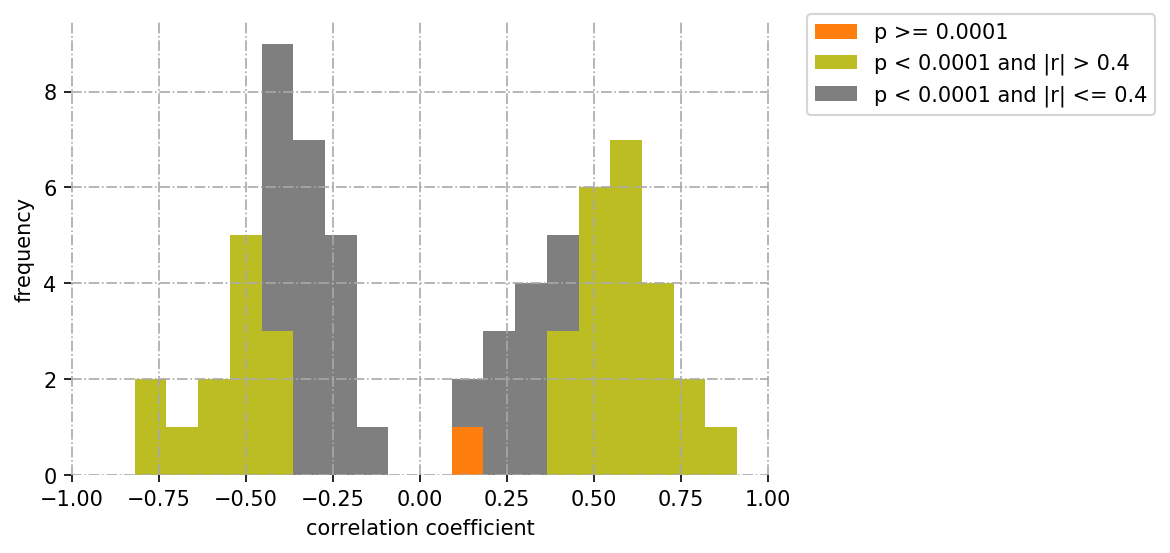

In [4]:
from sklearn.datasets import load_boston
data = load_boston()
cols = [0,1,2,4,5,6,7,8,9,10,11,12]
x = data.data[:,cols]

r, pval = ox.corr(x)

ox.hist_corr_pval(r, pval, plim=0.0001, dpi=150);

The correlation coefficients among the variables of the Boston dataset exhibit low p-values.
I set the threshold at `0.0001` (or `0.01%`) and still very few correlation coefficients had higher p-values (orange bar). 

### Interpretations

**Unrelated variables as x predictors (orange)**. 
Two unrelated variables will yield higher p-values, i.e. its correlation coefficient has any value just by chance, or resp. its correlation coefficient is meaningless or even misleading.
Such a result can be actually helpful. If the p-Value of two variables' correlation coefficient is very high, then both variables are favorable candidates as explanatory variables (or predictors, features) in a multivariate linear regression model or resp. any other supervised learning algorithm.

**Candiates for y and x (green)**.
As a rule of thumb a correlation coefficient above $|r|>0.4$ can be considered useful. 
If the accompanying p-value is below the accepted threshold (e.g. `plim=0.0001` or `0.01%`) then these high correlations can be considered significant. The use case would be to take such a pair of significant highly correlated variables as `y` and `x` variables in a linear regression model (or resp . any other supervised learning algorithm).

**Dangerous Results (gray)**.
There is not point of using variable pairs with significant low correlation coefficient (e.g. $|r|\leq 0.4$ and p-value less than `0.0001`) if you have other significantly highly correlated pairs (green) or unrelated pairs (orange).